# Exploratory Data Analysis

This notebook contains the exploratory data analysis, showing simple tables and plots explaining the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the Data

In [2]:
# Load data
airlines = pd.read_csv("airlines.csv")
flights = pd.read_csv("filtered_flights.csv")

### Most Reliable Airline

This section explores which of the airlines in the dataset is the most reliable, i.e., which airline has the fewest delays as well as the shortest average delays.

In [3]:
# Defining "on time" threshold as 15 minutes
on_time_threshold = 15

# Creating new variables saying whether a flight was delayed on departure and arrival, respectively
flights["dep_on_time"] = (flights["DEPARTURE_DELAY"] <= on_time_threshold).astype(int)
flights["arr_on_time"] = (flights["ARRIVAL_DELAY"] <= on_time_threshold).astype(int)

In [4]:
# Aggregating by airline
summary_performance = (
    flights.groupby("AIRLINE")
      .agg(
          mean_dep_delay=("DEPARTURE_DELAY", "mean"),
          mean_arr_delay=("ARRIVAL_DELAY", "mean"),
          dep_on_time_rate=("dep_on_time", "mean"),
          arr_on_time_rate=("arr_on_time", "mean"),
          n_flights=("AIRLINE", "size")
      )
)

In [5]:
# Showing full airline names instead of abbreviations
summary_performance = summary_performance.merge(
    airlines,
    left_on="AIRLINE",
    right_on="IATA_CODE",
    how="left"
).drop(columns=["IATA_CODE"])

In [6]:
# Sorting the airlines on highest on-time rate, then lowest average delay
summary_performance = summary_performance.sort_values(
    by=["arr_on_time_rate", "dep_on_time_rate", "mean_arr_delay", "mean_dep_delay"],
    ascending=[False, False, True, True]
)

Below is a table showing on time arrivals and departures as well as average arrival and departure delays.

In [7]:
# Showing the ranked airlines in a table
summary_performance[["AIRLINE", "n_flights",
                       "arr_on_time_rate", "dep_on_time_rate",
                       "mean_arr_delay", "mean_dep_delay"]
                       ].rename(columns={"AIRLINE": "Airline",
                                         "n_flights": "Total Flights",
                                         "arr_on_time_rate": "On Time Arrivals (Rate)",
                                         "dep_on_time_rate": "On Time Departures (Rate)",
                                         "mean_arr_delay": "Average Arrival Delay (Minutes)",
                                         "mean_dep_delay": "Average Departure Delay (Minutes)"}
                               ).reset_index(drop=True)

,Airline,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,Alaska Airlines Inc.,33201,0.881600,0.904973,-0.750732,0.593019
1,US Airways Inc.,11361,0.856527,0.893759,2.025438,3.224452
2,Delta Air Lines Inc.,47603,0.847951,0.840451,1.883597,8.364393
3,American Airlines Inc.,65055,0.839413,0.853324,1.818355,7.165833
4,United Air Lines Inc.,88315,0.813644,0.783978,4.235110,13.173306
5,Virgin America,29651,0.808506,0.819197,5.750772,9.171083
6,Skywest Airlines Inc.,134817,0.791169,0.803867,6.818962,8.588723
7,JetBlue Airways,20970,0.789080,0.789938,5.313444,10.661939
8,Southwest Airlines Co.,196907,0.785838,0.768916,6.720453,11.009291
9,Hawaiian Airlines Inc.,4299,0.773901,0.920679,6.508490,3.600605


The same thing can be showed in a bar plot, which is easier to interpret and compare across airlines.

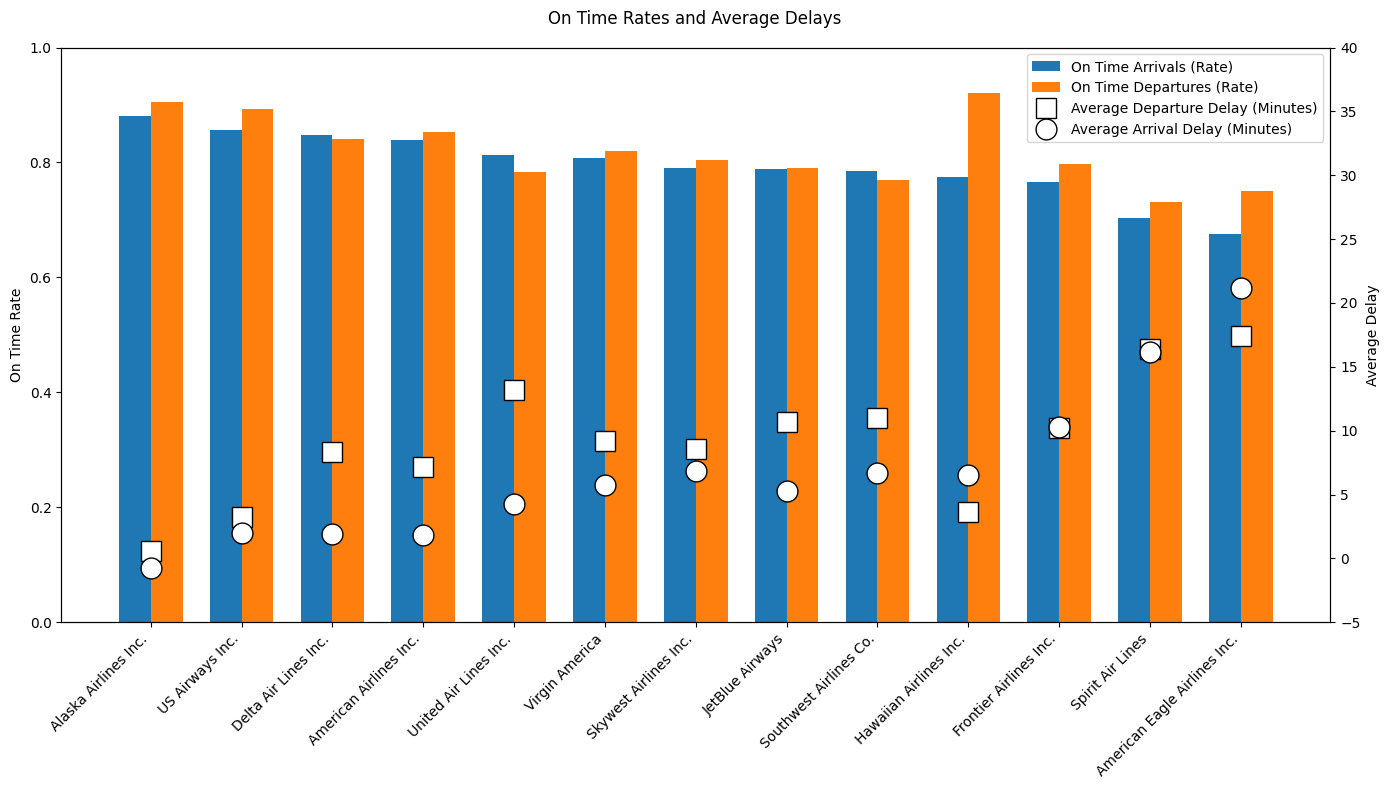

In [22]:
# Showing the ranked airlines in a bar chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# On Time Rates
width = 0.35
ax1.bar(np.arange(len(summary_performance["AIRLINE"])) - width/2, 
        summary_performance["arr_on_time_rate"], width, label="On Time Arrivals (Rate)")
ax1.bar(np.arange(len(summary_performance["AIRLINE"])) + width/2, 
        summary_performance["dep_on_time_rate"], width, label="On Time Departures (Rate)")
ax1.set_ylabel("On Time Rate")
ax1.set_ylim(0, 1)
ax1.set_xticks(np.arange(len(summary_performance["AIRLINE"])))
ax1.set_xticklabels(summary_performance["AIRLINE"], rotation=45, ha="right")

# Average Delays
ax2 = ax1.twinx()
ax2.plot(np.arange(len(summary_performance["AIRLINE"])), 
         summary_performance["mean_dep_delay"], marker="s", markersize=15, 
         linestyle="None", label="Average Departure Delay (Minutes)", 
         markerfacecolor="white", markeredgecolor="black")
ax2.plot(np.arange(len(summary_performance["AIRLINE"])), 
         summary_performance["mean_arr_delay"], marker="o", markersize=15, 
         linestyle="None", label="Average Arrival Delay (Minutes)", 
         markerfacecolor="white", markeredgecolor="black")
ax2.set_ylim(-5, 40)
ax2.set_ylabel("Average Delay")

# Title
fig.suptitle("On Time Rates and Average Delays")

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

plt.tight_layout()
plt.show()

Alaska Airlines stands out as the most reliable carrier in the dataset, with the highest on time arrival and departure rates and even a slightly negative average arrival delay, indicating flights arrive early. US Airways, Delta and American Airlines also perform well, showing high on time rates combined with relatively low average delays. In contrast, Spirit Airlines and American Eagle rank lowest, showing both poor on time performance and the largest average delays. Large airlines like United and Southwest operate many flights but suffer from high delays, telling us that scale may come at the cost of punctuality. Overall, the table and plot show big performance differences across airlines, with Alaska Airlines being the clear benchmark.